In [2]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns

# Diagramas

En la estadistica es muy común el uso de representaciones visuales para mostrar el comportamiendo de los datos, las cuales seran mostradas a continuación.

## Diagramas segun el tipo de datos

Numericas:
* Histograma
* Diagrama de cajas y bigotes
* 

Categoricas:
* Grafico de tortas.
* etc

## Histograma

```{admonition} Definición
Un **histograma** es una representación gráfica de una variable en forma de barras en la cual, la superficie de la barra es proporsional a la *frecuencia* de los valores representados. Son utiles por que sirven para obtener un panorama general de la forma como se distribuyen los datos.
```
La construcción de un histograms depende del tipo de datos que se esten empleando (discretos o continuos) tal y como de describe a continuación.

### Histograma a partir de datos discretos 
 
En primer lugar, se determinan la *frecuencia* y la *frecuencia* relativa de cada valor $x_i$. Luego se marcan los valores $x_i$ posibles en una escala horizontal. Sobre cada valor se traza un rectángulo cuya altura es la frecuencia relativa (o alternativamente, la frecuencia) de dicho valor: Los rectángulos deben medir lo mismo de ancho.

#### Ejemplo 1

¿Qué tan inusual es un juego de beisbol sin [hit](https://es.wikipedia.org/wiki/Hit_(b%C3%A9isbol)) o de un hit en las ligas mayores y cuán frecuentemente un equipo pega más de 10, 15 o incluso 20 hits? La siguiente tabla muestra el numero de hits conectados por equipo y por juego de todos los juegos de nueve episodios que se jugaron entre 1989 y 1993. (**Nota**: Este ejemplo fue tomado del libro **Probabilidad y estadistica para Ciencias e Ingenieria** (Jay L. Devore)).

|Hits/juego|Numero de juegos|
|---|---|
|0 | 20 | 
|1 | 72 | 
|2 | 209 | 
|3 | 527 | 
|4 | 1048 | 
|5 | 1457 | 
|6 | 1988 | 
|7 | 2256 | 
|8 | 2403 | 
|9 | 2256 | 
|10 | 1967 | 
|11 | 1509 | 
|12 | 1230 | 
|13 | 834 | 
|14 | 569 | 
|15 | 393 | 
|16 | 253 | 
|17 | 171 | 
|18 | 97 | 
|19 | 53 | 
|20 | 31 | 
|21 | 19 | 
|22 | 13 | 
|23 | 5 | 
|24 | 1 | 
|25 | 0 | 
|26 | 1 | 
|27 | 1 | 

Se pide:
1. Defina el DataFrame asociado a la tabla
2. Calcule la frecuencia relativa.
3. Dibuje el histograma.

In [40]:
# 1
raw_data = {"hits_per_game":np.arange(28),
            "games": [20, 72, 209, 527, 1048, 1457, 1988, 2256, 2403, 
                      2256, 1967, 1509, 1230, 834, 569, 393, 253, 171, 
                      97, 53, 31, 19, 13, 5, 1, 0, 1, 1]
           }

df = pd.DataFrame(raw_data, columns = raw_data.keys())
df.head()


,hits_per_game,games
0,0,20
1,1,72
2,2,209
3,3,527
4,4,1048


In [41]:
# 2
df_freq = df.copy()
df_freq['freq_rel']= df['games']/df['games'].sum()
df_freq.head()

,hits_per_game,games,freq_rel
0,0,20,0.001032
1,1,72,0.003715
2,2,209,0.010783
3,3,527,0.027189
4,4,1048,0.054068


In [6]:
print("Catidad total de juegos", df_freq['games'].sum())
print("Suma de las frecuencias", df_freq['freq_rel'].sum())

Catidad total de juegos 19383
Suma de las frecuencias 1.0


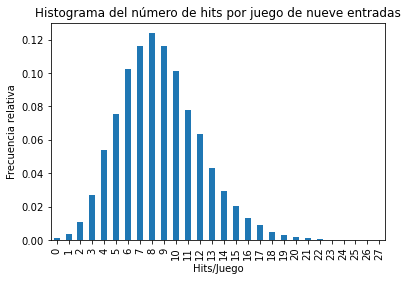

In [38]:
# Ya se han contado los elementos (se uso pandas para el histograma) 
df_freq['freq_rel'].plot(kind='bar', 
                         title ='Histograma del número de hits por juego de nueve entradas',
                         xlabel="Hits/Juego",
                         ylabel="Frecuencia relativa");


### Histograma a partir de datos continuos
En este caso, se divide el eje de medición entre un número adecuado de **intervalos de clase o clases** (**bins**). Cuando el ancho de las clases es el mismo, lo que se hace es determinar la frecuencia y la frecuencia relativa de cada clase contando la cantidad de muestras que se encuentran dentro de cada intervalo y usando frecuencia relativa como la altura del correspondiente intervalo.

#### Ejemplo 2

Los siguientes datos muestran la cantidad de horas dedicadas a jugar juegos de video de un grupo de estudiantes.

```
9.95  10  2.25  16.75  0
19.5  22.5  7.5  15  12.75
5.5  11	 10  20.75  17.5
23  21.9  24  23.75  18
20  15  22.9  18.8  20.5
```

Construya un histograma agrupando los datos en cinco clases.

##### Grafica empleando Matplotlib

In [33]:
# --- Usando Numpy ---
# Creacion de la tabla
data = np.array([9.95, 10, 2.25, 16.75, 0, 19.5, 22.5, 7.5, 15, 12.75,
        5.5, 11, 10, 20.75, 17.5, 23, 21.9, 24, 23.75, 18,
        20, 15, 22.9, 18.8, 20.5])
data

array([ 9.95, 10.  ,  2.25, 16.75,  0.  , 19.5 , 22.5 ,  7.5 , 15.  ,
       12.75,  5.5 , 11.  , 10.  , 20.75, 17.5 , 23.  , 21.9 , 24.  ,
       23.75, 18.  , 20.  , 15.  , 22.9 , 18.8 , 20.5 ])

In [70]:
# Histograma de cinco grupos
plt.style.use('classic')
hist = np.histogram(data, bins=5)
hist

(array([ 2,  2,  5,  6, 10], dtype=int64),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. ]))

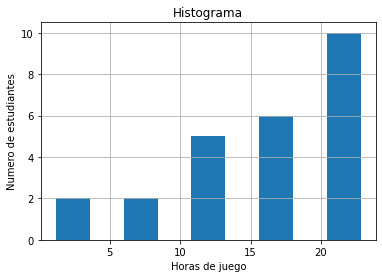

In [37]:
# Grafica del histograma usando Matplotlib
fig, ax = plt.subplots()

ax.hist(data, bins=5,histtype='bar', rwidth=0.5)
ax.set_xlabel("Horas de juego");
ax.set_ylabel("Numero de estudiantes");
ax.set_title('Histograma'); 

##### Grafica empleando Pandas

In [49]:
# Creacion del dataframe
data = np.array([9.95, 10, 2.25, 16.75, 0, 19.5, 22.5, 7.5, 15, 12.75,
        5.5, 11, 10, 20.75, 17.5, 23, 21.9, 24, 23.75, 18,
        20, 15, 22.9, 18.8, 20.5])

df = pd.DataFrame({'hours': data})
df.head() 

,hours
0,9.95
1,10.00
2,2.25
3,16.75
4,0.00


In [50]:
hist = pd.cut(df['hours'], bins = 5).value_counts().sort_values(ascending=True)
hist

(-0.024, 4.8]     2
(4.8, 9.6]        2
(9.6, 14.4]       5
(14.4, 19.2]      6
(19.2, 24.0]     10
Name: hours, dtype: int64

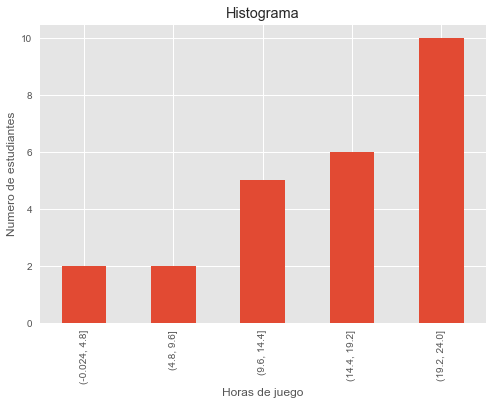

In [64]:
plt.style.use('ggplot')
hist.plot(kind='bar',xlabel="Horas de juego", ylabel="Numero de estudiantes",title="Histograma");

##### Grafica empleando Seaborn

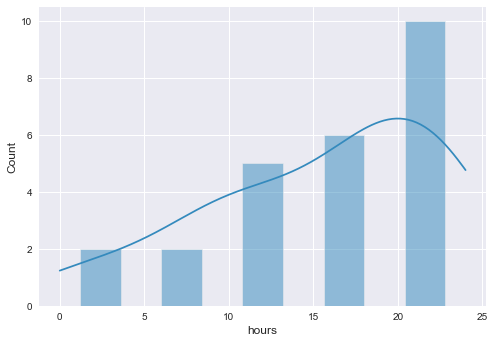

In [65]:
plt.style.use('seaborn-darkgrid')
sns.histplot(df,
             bins=5,
             x="hours",
             kde=True,
             shrink=.5);

#### Ejemplo 3

El artículo **"Determination of Most Representative Subdivision"** (J. of Energy Engr., 1993: 43-55) proporciona datos sobre varias características de subdivisiones que podrían utilizarse para decidir si se suministra energía eléctrica mediante líneas elevadas o por medio de líneas subterráneas. He aquí los valores de la variable *x = longitud total de calles dentro de una subdivisión*:

```
1280 5320 4390 2100 1240 3060 4770
1050 360 3330 3380 340 1000 960
1320 530 3350 540 3870 1250 2400
960 1120 2120 450 2250 2320 2400
3150 5700 5220 500 1850 2460 5850
2700 2730 1670 100 5770 3150 1890
510 240 396 1419 2109
```

Construya un histograma con los límites de clase, 0, 1000, 2000, 3000, 4000, 5000 y 6000.

##### Solución empleando Matplolib

In [71]:
# Usando Numpy
# Creacion de la tabla
data = [1280, 5320, 4390, 2100, 1240, 3060, 4770, 1050, 360, 3330, 3380, 340, 1000, 960,
        1320, 530, 3350, 540, 3870, 1250, 2400, 960, 1120, 2120, 450, 2250, 2320, 2400, 
        3150, 5700, 5220, 500, 1850, 2460, 5850, 2700, 2730, 1670, 100, 5770, 3150, 1890,
        510, 240, 396, 1419, 2109]
print(data)

[1280, 5320, 4390, 2100, 1240, 3060, 4770, 1050, 360, 3330, 3380, 340, 1000, 960, 1320, 530, 3350, 540, 3870, 1250, 2400, 960, 1120, 2120, 450, 2250, 2320, 2400, 3150, 5700, 5220, 500, 1850, 2460, 5850, 2700, 2730, 1670, 100, 5770, 3150, 1890, 510, 240, 396, 1419, 2109]


In [72]:
hist = np.histogram(data, bins=6, range=(0,6000))
hist

(array([12, 11, 10,  7,  2,  5], dtype=int64),
 array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]))

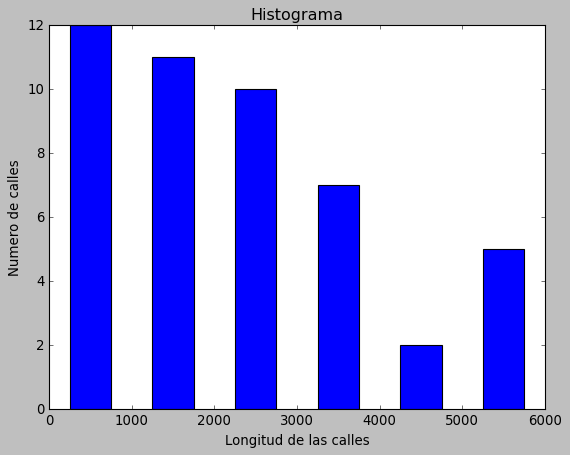

In [83]:
fig, ax = plt.subplots()
ax.hist(data, bins=6, range=(0,6000), rwidth = 0.5);
ax.set_xlabel("Longitud de las calles");
ax.set_ylabel("Numero de calles");
plt.title('Histograma');
#plt.title('Histograma de longitud total de calles dentro de una subdivisión')
#plt.grid(True)
#plt.hist(data, bins=6, range=(0,6000));

##### Solución empleando Pandas

In [84]:
df = pd.DataFrame({'long_calles':[1280, 5320, 4390, 2100, 1240, 3060, 4770, 1050, 360, 3330, 3380, 340, 1000, 960,
        1320, 530, 3350, 540, 3870, 1250, 2400, 960, 1120, 2120, 450, 2250, 2320, 2400, 
        3150, 5700, 5220, 500, 1850, 2460, 5850, 2700, 2730, 1670, 100, 5770, 3150, 1890,
        510, 240, 396, 1419, 2109]})
df.head()

,long_calles
0,1280
1,5320
2,4390
3,2100
4,1240


In [87]:
clases = pd.IntervalIndex.from_tuples([(0, 1000), (1000, 2000) ,(2000, 3000), (3000, 4000), (4000, 5000), (5000, 6000)])
hist = pd.cut(df['long_calles'], bins = clases)
hist

0     (1000, 2000]
1     (5000, 6000]
2     (4000, 5000]
3     (2000, 3000]
4     (1000, 2000]
5     (3000, 4000]
6     (4000, 5000]
7     (1000, 2000]
8        (0, 1000]
9     (3000, 4000]
10    (3000, 4000]
11       (0, 1000]
12       (0, 1000]
13       (0, 1000]
14    (1000, 2000]
15       (0, 1000]
16    (3000, 4000]
17       (0, 1000]
18    (3000, 4000]
19    (1000, 2000]
20    (2000, 3000]
21       (0, 1000]
22    (1000, 2000]
23    (2000, 3000]
24       (0, 1000]
25    (2000, 3000]
26    (2000, 3000]
27    (2000, 3000]
28    (3000, 4000]
29    (5000, 6000]
30    (5000, 6000]
31       (0, 1000]
32    (1000, 2000]
33    (2000, 3000]
34    (5000, 6000]
35    (2000, 3000]
36    (2000, 3000]
37    (1000, 2000]
38       (0, 1000]
39    (5000, 6000]
40    (3000, 4000]
41    (1000, 2000]
42       (0, 1000]
43       (0, 1000]
44       (0, 1000]
45    (1000, 2000]
46    (2000, 3000]
Name: long_calles, dtype: category
Categories (6, interval[int64, right]): [(0, 1000] < (1000, 2000] < (200

In [88]:
freq_rel = hist.value_counts()
freq_rel

(0, 1000]       13
(1000, 2000]    10
(2000, 3000]    10
(3000, 4000]     7
(5000, 6000]     5
(4000, 5000]     2
Name: long_calles, dtype: int64

In [89]:
df_hist = pd.DataFrame({'longitudes' : ['[0, 1000]','(1000, 2000]','(2000, 3000]','(3000, 4000]','(4000, 5000]','(5000, 6000]'],
                        'freq_relativa': freq_rel})
df_hist

,longitudes,freq_relativa
"(0, 1000]","[0, 1000]",13
"(1000, 2000]","(1000, 2000]",10
"(2000, 3000]","(2000, 3000]",10
"(3000, 4000]","(3000, 4000]",7
"(5000, 6000]","(4000, 5000]",5
"(4000, 5000]","(5000, 6000]",2


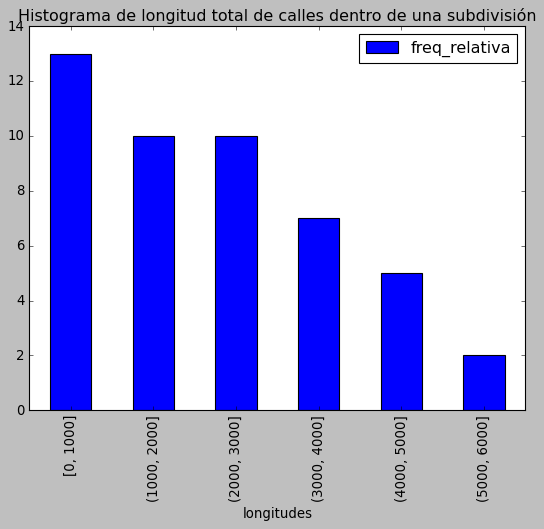

In [91]:
df_hist.plot(kind='bar', 
             title ='Histograma de longitud total de calles dentro de una subdivisión',
             x="longitudes");


##### Solución empleando Seaborn

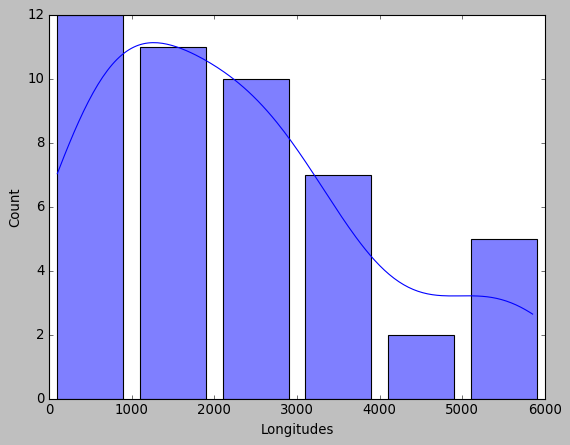

In [101]:
ax = sns.histplot(data,
             bins=[0,1000,2000,3000,4000,5000,6000],             
             kde=True,
             shrink=.8);
ax.set(xlabel='Longitudes');

## Grafica de cajas y bigotes

```{admonition} Definición
La grafica de cajas y bigotes se usa para describir varias de las características más prominentes de un conjunto de datos. Las cuales incluyen:
1. El centro
2. La dispersión
3. El grado y la naturaleza de cualquier alejamiento de la simetría
4. La identificación de las observaciones "atípicas" inusualmente alejadas del cuerpo principal de los datos.
```

En la grafica de caja muestra de manera grafica un resumen que describe los cinco estadisticos:

||Quartile|Statistic|Percentile|
|---|---|---|---|
|1.|$Q_0$|minimum|$0^{th}$|
|2.|$Q_1$|N/A|$25^{th}$|
|3.|$Q_2$|median|$50^{th}$|
|4.|$Q_3$|N/A|$75^{th}$|
|5.|$Q_4$|maximum|$100^{th}$|

La caja tiene el limite inferior en el cuartil $Q_1$ y el superior en el cuartil $Q_3$. La mediana se encuentra en la linea que se encuentra dentro de la caja y los bigotes se extienden desde la caja hasta los extremos (minimo y maximo). Para mejorar la visualizacion, los puntos atipicos se muestran como los puntos que se encuentran por encima cuartil $Q_3+1.5\times IRQ$ y abajo del cuartil $Q_1-1.5\times IRQ$ tal y como se muestra en la siguiente figura:

![cajas_bigotes](p1_ch1_s3/diagrama_cajas.png)

### Ejemplo 1

La ley Clean Water (agua limpia) y las modificaciones posteriores requieren que todas las aguas en los Estados Unidos alcancen los objetivos de reducción de la contaminación para garantizar que el agua sea "apta para la pesca y para nadar". El artículo “Spurious Correlation in the USEPA Rating Curve Method for Estimating Pollutant Loads” (J. of Environ. Engr., 2008: 610-618) ha investigado diferentes técnicas para estimar las cargas contaminantes en las cuencas hidrográficas; los autores "discuten la necesidad imperiosa del uso racional de los métodos estadísticos" para este fin. Entre los datos que se consideran está la siguiente muestra de cargas de NT (nitrógeno total) (kg N/día), a partir de una determinada ubicación en la Bahía de Chesapeake, que aparece aquí en orden creciente.

```
9.69 13.16 17.09 18.12 23.70 24.07 24.29 26.43
30.75 31.54 35.07 36.99 40.32 42.51 45.64 48.22
49.98 50.06 55.02 57.00 58.41 61.31 64.25 65.24
66.14 67.68 81.40 90.80 92.17 92.42 100.82 101.94
103.61 106.28 106.80 108.69 114.61 120.86 124.54 143.27
143.75 149.64 167.79 182.50 192.55 193.53 271.57 292.61
312.45 352.09 371.47 444.68 460.86 563.92 690.11 826.54
1529.35
```

Obtenga, los 5 estadisticos resumen y dibuje el diagrama de cajas y bigotes para los datos anteriores.

#### Solución empleando Matplotlib

In [3]:
# Dataframe asociado a los datos
data = np.array([9.69, 13.16, 17.09, 18.12, 23.70, 24.07, 24.29, 26.43,
                 30.75, 31.54, 35.07, 36.99, 40.32, 42.51, 45.64, 48.22,
                 49.98, 50.06, 55.02, 57.00, 58.41, 61.31, 64.25, 65.24,
                 66.14, 67.68, 81.40, 90.80, 92.17, 92.42, 100.82, 101.94,
                 103.61, 106.28, 106.80, 108.69, 114.61, 120.86, 124.54, 143.27,
                 143.75, 149.64, 167.79, 182.50, 192.55, 193.53, 271.57, 292.61,
                 312.45, 352.09, 371.47, 444.68, 460.86, 563.92, 690.11, 826.54,
                 1529.35])
print(data)

[   9.69   13.16   17.09   18.12   23.7    24.07   24.29   26.43   30.75
   31.54   35.07   36.99   40.32   42.51   45.64   48.22   49.98   50.06
   55.02   57.     58.41   61.31   64.25   65.24   66.14   67.68   81.4
   90.8    92.17   92.42  100.82  101.94  103.61  106.28  106.8   108.69
  114.61  120.86  124.54  143.27  143.75  149.64  167.79  182.5   192.55
  193.53  271.57  292.61  312.45  352.09  371.47  444.68  460.86  563.92
  690.11  826.54 1529.35]


In [5]:
# Obtencion de los estadisticos resumen
min_data = np.quantile(data,q = 0.0) # np.percentile(data,q = 0)
max_data = np.quantile(data,q = 1.0) # np.percentile(data,q = 100)
Q1_data = np.quantile(data,q = 0.25) # np.percentile(data,q = 25)
Q3_data = np.quantile(data,q = 0.75) # np.percentile(data,q = 75)
median_data = np.quantile(data,q = 0.5) # np.median(data)
rango_data = np.ptp(data)
# Despliegue de los estadisticos
print("Resumen cargas de NT (kg N/día)")
print("- Minimo: ", min_data, sep="")
print("- Q1: ", Q1_data , sep="")
print("- Mediana: ", median_data , sep="")
print("- Q3: ", Q3_data , sep="")
print("- Maximo: ", max_data, sep="")
print("- IRQ: ", Q3_data - Q1_data, sep="")

Resumen cargas de NT (kg N/día)
- Minimo: 9.69
- Q1: 45.64
- Mediana: 92.17
- Q3: 167.79
- Maximo: 1529.35
- IRQ: 122.14999999999999


Text(0.5, 0, 'Carga de NT (Kg N/dia)')

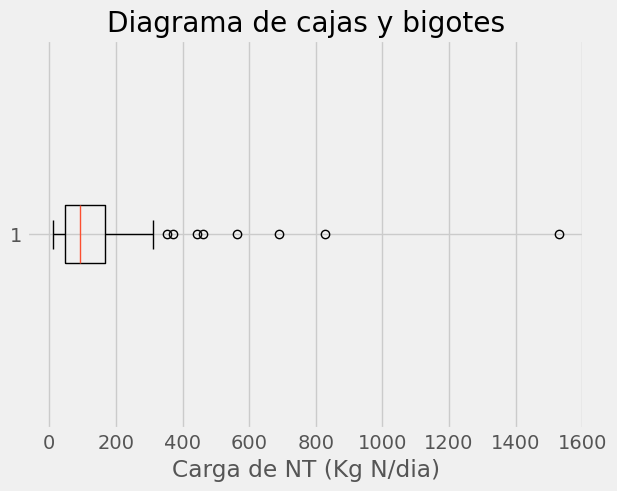

In [19]:
# Diagrama de cajas y bigotes
plt.style.use('fivethirtyeight')
fig1, ax = plt.subplots();
ax.set_title('Diagrama de cajas y bigotes');
ax.boxplot(data,vert=False);
ax.set_xlabel("Carga de NT (Kg N/dia)")

#### Usando pandas

In [13]:
# Dataframe asociado a los datos
df = pd.DataFrame({'carga_NT':[9.69, 13.16, 17.09, 18.12, 23.70, 24.07, 24.29, 26.43,
                 30.75, 31.54, 35.07, 36.99, 40.32, 42.51, 45.64, 48.22,
                 49.98, 50.06, 55.02, 57.00, 58.41, 61.31, 64.25, 65.24,
                 66.14, 67.68, 81.40, 90.80, 92.17, 92.42, 100.82, 101.94,
                 103.61, 106.28, 106.80, 108.69, 114.61, 120.86, 124.54, 143.27,
                 143.75, 149.64, 167.79, 182.50, 192.55, 193.53, 271.57, 292.61,
                 312.45, 352.09, 371.47, 444.68, 460.86, 563.92, 690.11, 826.54,
                 1529.35]})
df.head()

,carga_NT
0,9.69
1,13.16
2,17.09
3,18.12
4,23.70


In [14]:
# Resumen estadistico de los datos
df.describe()

,carga_NT
count,57.000000
mean,170.110526
std,249.571252
min,9.690000
25%,45.640000
50%,92.170000
75%,167.790000
max,1529.350000


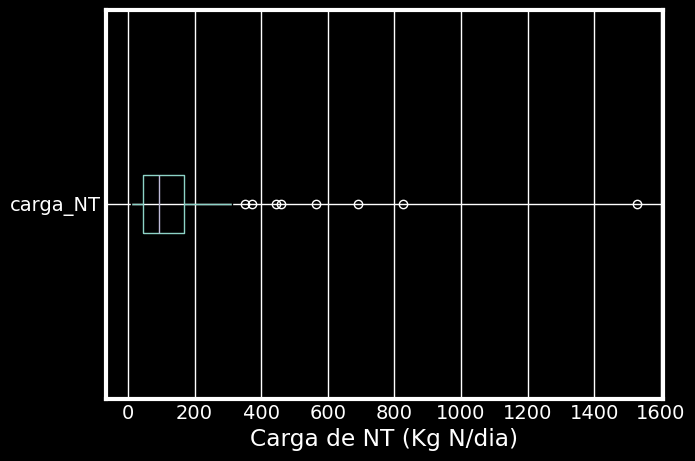

In [20]:
plt.style.use('dark_background')
boxplot = df.boxplot(vert=False)
boxplot.set_xlabel("Carga de NT (Kg N/dia)");


#### Usando Seaborn

Text(0.5, 0, 'Carga de NT (Kg N/dia)')

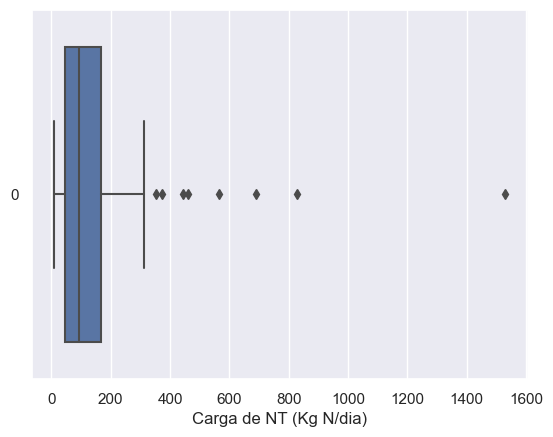

In [33]:
sns.set(style="darkgrid")
ax = sns.boxplot(df['carga_NT'], orient='h'); # sns.boxplot(data);
ax.set_xlabel("Carga de NT (Kg N/dia)")

#### Version mejorada del ejemplo

##### Resumiendo los datos


In [61]:
df.describe()

,carga_NT
count,57.000000
mean,170.110526
std,249.571252
min,9.690000
25%,45.640000
50%,92.170000
75%,167.790000
max,1529.350000


##### Grafica customizada

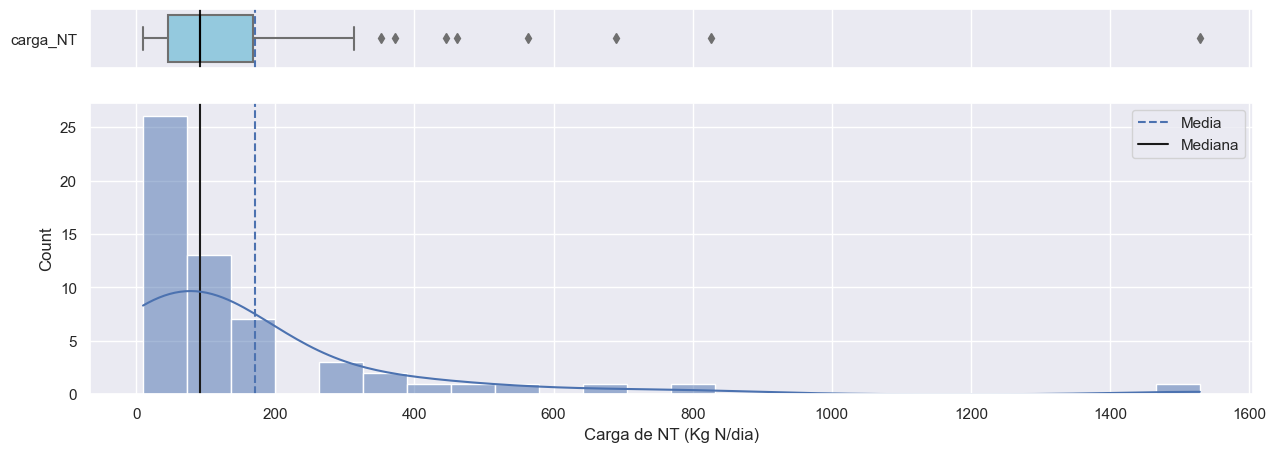

In [97]:

def central_measures(data):
    f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)},figsize=(15,5))
    [axi.axvline(data.mean()[0],color='b',ls='--',label='Media') for axi in ax] # Media
    [axi.axvline(data.median()[0],color='k',label='Mediana') for axi in ax] # Mediana
    sns.boxplot(data, ax=ax[0],color='skyblue',medianprops={'color':'black'},orient='h') # Boxplot
    
    [a.set_edgecolor('black')for a in ax[0].artists]
    ax[0].set(xlabel='')
    sns.histplot(data, kde=True,ax=ax[1])

    ax[1].legend()
    ax[1].set(xlabel='Carga de NT (Kg N/dia)')
    plt.show()

central_measures(df)

## Grafico de Tortas

```{admonition} Definición
Un **grafico de tortas** es una representación gráfica de una distribución de frecuencias de un conjunto de datos categoricos. Cada categoria es representada por pedazo de la torta de tal manera que el area del pedazo es proporcional a la frecuencia correspondiente o frecuencia relativa.
```

### Ejemplo 1

Suponga que un profesor llamo a lista y contabilizo la cantidad de asistentes a cada clase resumiendolos la siguiente tabla:

|Day|Students|
|---|---|
|Mon | 30 |
|Tue | 50 |
|Wed | 12 |
|Thu | 62 |
|Fri | 80 |

Dibujar un grafico de torta a partir de la tabla anterior.

#### Solución empleando matplotlib

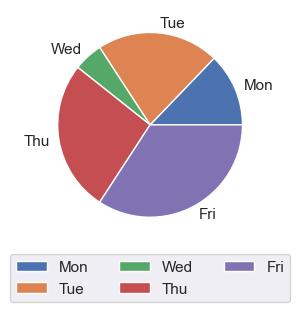

In [98]:
# Datos
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
ordered = [30, 50, 12, 62, 80]

# Grafica
fig = plt.figure(figsize=(3, 3))
ax= fig.add_subplot(111) 

ax.pie(ordered, labels=days); 

plt.legend(ncol=3,  # Number of columns in the legend
           loc='lower center',  # Location of the legend
           bbox_to_anchor=[.5, -.3], # To set the location of the legend more precisely
           );

#### Solución empleando pandas

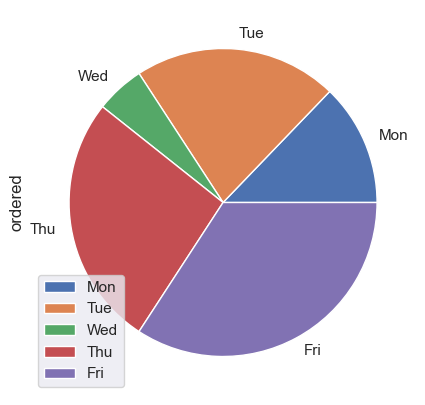

In [99]:
# Data
df = pd.DataFrame({'days':['Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
                   'ordered':  [30, 50, 12, 62, 80]},
                  index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
# Grafica
plot = df.plot.pie(y='ordered', figsize=(5, 5))

#### Solución empleando seaborn

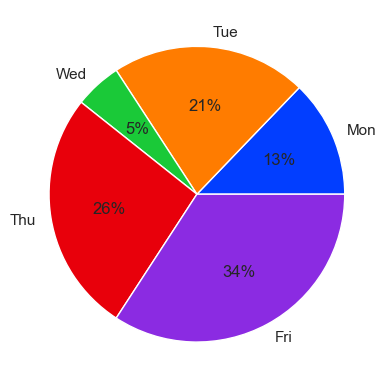

In [100]:

# Datos
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
ordered = [30, 50, 12, 62, 80]

#define Seaborn color palette to use
palette_color = sns.color_palette('bright')[0:5]

plt.pie(ordered, labels=days, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

## Grafico de barras

```{admonition} Definición
El **grafico de barras** permite graficar la distribución de frecuencias para un conjunto de datos categoricos. En este, cada categoria es representada por una barra cuya areas es proporcional a la frecuencia o frecuencia relativa de la categoria a la que se asocia.
```

### Ejemplo 2

Suponga que un profesor llamo a lista y contabilizo la cantidad de asistentes a cada clase resumiendolos la siguiente tabla:

|Day|Students|
|---|---|
|Mon | 30 |
|Tue | 50 |
|Wed | 12 |
|Thu | 62 |
|Fri | 80 |

Dibujar un grafico de barras a partir de la tabla anterior.

#### Solución empleando Matplotlib

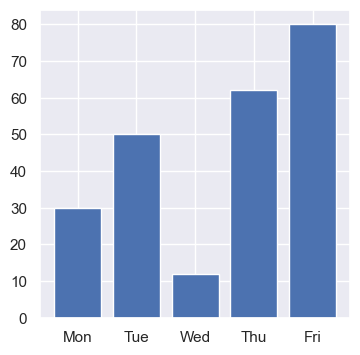

In [104]:
# Data
df = pd.DataFrame({'days':['Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
                   'ordered':  [30, 50, 12, 62, 80]},
                  index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

fig = plt.figure(figsize=(4, 4))

# Instead of seperating the number of rows, cols nad plot number, we can put them without seperator
ax= fig.add_subplot(111) 

# A simple bar plot
ax.bar(x=days, # Categorical variable
       height=ordered # Numeric variable
       );

#### Solución empleando pandas

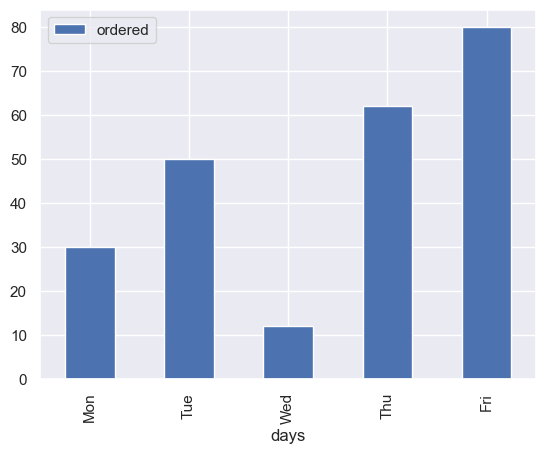

In [105]:
# Data
df = pd.DataFrame({'days':['Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
                   'ordered':  [30, 50, 12, 62, 80]},
                  index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

df.plot.bar(x = 'days', y = 'ordered'); # df.plot.bar()

#### Solución empleando seaborn

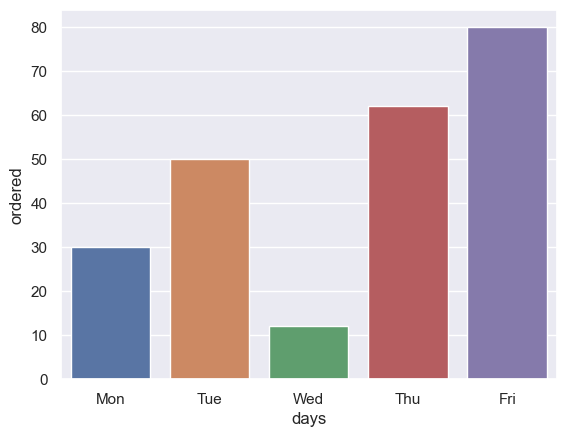

In [106]:
df = pd.DataFrame({'days':['Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
                   'ordered':  [30, 50, 12, 62, 80]},
                  index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

ax = sns.barplot(x="days", y="ordered", data=df) 

## Referencias

1. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition
2. https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition
3. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/master/Chapter05/Ch5.ipynb
4. https://github.com/ajaymache/data-analysis-using-python
5. https://github.com/AmirMardan/ml_course
6. https://github.com/thomasnield/oreilly-probability-from-scratch
7. https://github.com/thomasnield/oreilly_math_fundamentals_data_science
8. https://github.com/WalePhenomenon/MathsForML
9. https://github.com/pabloinsente/math-app-ml
10. https://github.com/iamzehan/A-little-bit-of-Math
11. https://github.com/vanderbilt-data-science/into-data-science
12. 